# Rice Classification Model Training

This notebook trains a machine learning model to classify different types of rice based on their features.

## Import Required Libraries
Import libraries such as pandas, numpy, matplotlib, sklearn, and any other necessary libraries.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import joblib
import os

# Configure visualizations
%matplotlib inline
sns.set(style="whitegrid")

In [ ]:
# Install tensorflow-addons if rotation augmentation is needed
try:
    import tensorflow_addons as tfa
    print("tensorflow-addons already installed.")
except ImportError:
    print("Installing tensorflow-addons...")
    !pip install tensorflow-addons -q # -q for quiet installation
    import tensorflow_addons as tfa
    print("tensorflow-addons installed successfully.")

## Load and Explore the Dataset
Load the rice dataset using pandas and perform exploratory data analysis (EDA) to understand the data.

Dataset loaded successfully.
First 5 rows of the dataset:
     image_id                  label variety  age
0  100330.jpg  bacterial_leaf_blight   ADT45   45
1  100365.jpg  bacterial_leaf_blight   ADT45   45
2  100382.jpg  bacterial_leaf_blight   ADT45   45
3  100632.jpg  bacterial_leaf_blight   ADT45   45
4  101918.jpg  bacterial_leaf_blight   ADT45   45

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB

Summary Statistics:
                age
count  10407.000000
mean      64.043624
std        8.958830
min       45.000000
25%       60.000000
50%       67.000000
75%       70.000000
max       82.000000

Label Distribution:
label
normal     

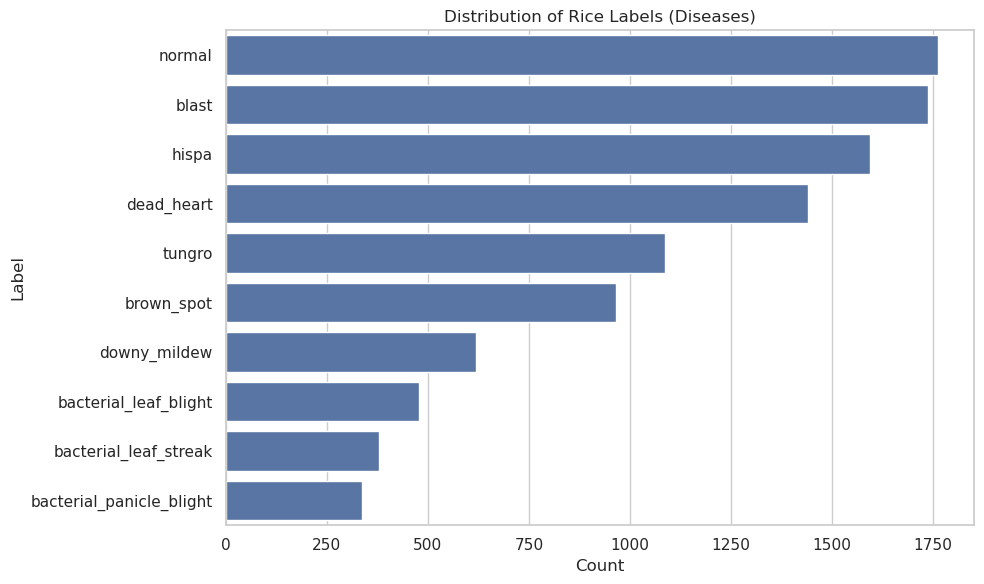

In [3]:
# Load the dataset
# Replace 'path/to/your/rice_dataset.csv' with the actual path to your dataset
df = pd.read_csv('./Dataset/meta_train.csv') # Assuming the transformed dataset is in the same directory
print("Dataset loaded successfully.")
    # print("Error: Dataset file not found. Please ensure 'Rice_Dataset_Transformed.csv' is in the correct directory.")
    # Add alternative path or exit if necessary
    # df = pd.read_csv('/path/to/your/rice_dataset.csv') # Example alternative path

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Display the distribution of the target variable (label)
print("\nLabel Distribution:")
print(df['label'].value_counts())

# Visualize the distribution of labels
plt.figure(figsize=(10, 6)) # Increased figure size for better label visibility if many classes
sns.countplot(y='label', data=df, order = df['label'].value_counts().index) # Use y='label' for horizontal plot if labels are long
plt.title('Distribution of Rice Labels (Diseases)')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout() # Adjust layout
plt.show()

# Explore correlations between features (optional, especially if many features)
# plt.figure(figsize=(12, 10))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Features')
# plt.show()

## Preprocess the Data
Handle missing values, normalize features, and encode categorical variables if necessary.

*Note: Based on the EDA of `Rice_Dataset_Transformed.csv`, significant preprocessing might have already been done. We will primarily focus on feature scaling and ensuring the target variable is correctly encoded if needed.*

In [4]:
# Check for missing values again (should be none if handled previously)
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
image_id    0
label       0
variety     0
age         0
dtype: int64


In [5]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Encode the target variable if it's categorical (e.g., strings 'Arborio', 'Jasmine')
# If 'Class' is already numerical (0, 1, etc.), this step might not be needed or adjusted.
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    print("\nTarget variable encoded.")
    # Save the mapping for later interpretation
    class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print("Class Mapping:", class_mapping)
else:
    print("\nTarget variable is already numerical.")

# Normalize/Scale the features
# Features seem to be numerical, scaling is generally recommended for many ML algorithms.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame (optional, for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFirst 5 rows of scaled features:")
print(X_scaled_df.head())

KeyError: "['Class'] not found in axis"

## Split the Data into Training and Testing Sets
Use train_test_split from sklearn to divide the dataset into training and testing sets.

In [ ]:
# Split the data into training (80%) and testing (20%) sets
# Using the scaled features (X_scaled) and encoded target (y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

## Build the Machine Learning Model
Define a machine learning model using sklearn or another library, such as Logistic Regression, Random Forest, or SVM. We can try a few and compare.

In [ ]:
# Initialize different models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Support Vector Machine": SVC(random_state=42, probability=True) # probability=True for predict_proba if needed later
}

print("\nModels initialized:")
for name in models:
    print(f"- {name}")

## Train the Model
Fit the model to the training data and monitor the training process.

In [ ]:
# Train each model
trained_models = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")

## Evaluate the Model
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score on the test set.

In [ ]:
# Evaluate each trained model on the test set
results = {}
for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"\n--- {name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    print("\nClassification Report:")
    # Use target_names if label encoder was used
    if 'label_encoder' in globals():
        target_names = label_encoder.classes_
        print(classification_report(y_test, y_pred, target_names=target_names))
    else:
        # Assuming numerical classes 0, 1, ...
        target_names = [str(i) for i in np.unique(y_test)]
        print(classification_report(y_test, y_pred, target_names=target_names))


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Compare model performances
results_df = pd.DataFrame(results).T # Transpose for better readability
print("\n--- Model Comparison ---")
print(results_df)

# Select the best model based on a chosen metric (e.g., F1-Score or Accuracy)
best_model_name = results_df['F1-Score'].idxmax() # Or Accuracy
best_model = trained_models[best_model_name]
print(f"\nBest performing model based on F1-Score: {best_model_name}")

## Save the Trained Model
Save the best-performing trained model to a file using joblib or pickle for future use. Also save the scaler and label encoder (if used).

In [ ]:
# Define the directory to save models and transformers
output_dir = 'saved_models'
os.makedirs(output_dir, exist_ok=True)

# Save the best model
model_filename = os.path.join(output_dir, f'{best_model_name.replace(" ", "_").lower()}_rice_model.joblib')
joblib.dump(best_model, model_filename)
print(f"\nBest model ({best_model_name}) saved to {model_filename}")

# Save the scaler
scaler_filename = os.path.join(output_dir, 'scaler.joblib')
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved to {scaler_filename}")

# Save the label encoder if it was used
if 'label_encoder' in globals():
    encoder_filename = os.path.join(output_dir, 'label_encoder.joblib')
    joblib.dump(label_encoder, encoder_filename)
    print(f"Label encoder saved to {encoder_filename}")

print("\nModel training and saving process complete.")